## **BIKE BUYERS PREDICTION**

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

## Loading Dataset

In [2]:
df = pd.read_excel(r"C:/Portfolio-Projects/Bike-Buyers-Prediction/excel/Cleaned_Data.xlsx")
df

,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Bracket,Purchased Bike
0,1,0,3,1,0,0,0,42,1,0
1,3,3,0,1,1,0,0,43,1,0
2,5,3,4,0,2,2,0,60,1,0
3,0,0,4,1,1,3,1,41,1,1
4,0,0,0,0,0,0,0,36,1,1
...,...,...,...,...,...,...,...,...,...,...
995,2,2,4,1,2,2,2,54,1,1
996,4,5,4,1,0,2,2,35,1,1
997,2,0,3,1,0,0,2,38,1,1
998,3,0,1,0,3,1,2,38,1,0


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Children          1000 non-null   int64
 1   Education         1000 non-null   int64
 2   Occupation        1000 non-null   int64
 3   Home Owner        1000 non-null   int64
 4   Cars              1000 non-null   int64
 5   Commute Distance  1000 non-null   int64
 6   Region            1000 non-null   int64
 7   Age               1000 non-null   int64
 8   Age Bracket       1000 non-null   int64
 9   Purchased Bike    1000 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB


In [4]:
df.describe()

,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Bracket,Purchased Bike
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.898000,2.327000,2.280000,0.68300,1.442000,1.513000,1.208000,44.163000,0.990000,0.481000
std,1.628572,1.804252,1.470974,0.46554,1.125123,1.426136,0.874929,11.364488,0.458378,0.499889
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,35.000000,1.000000,0.000000
50%,2.000000,3.000000,3.000000,1.00000,1.000000,1.000000,2.000000,43.000000,1.000000,0.000000
75%,3.000000,3.250000,4.000000,1.00000,2.000000,3.000000,2.000000,52.000000,1.000000,1.000000
max,5.000000,5.000000,4.000000,1.00000,4.000000,4.000000,2.000000,89.000000,2.000000,1.000000


In [66]:
corr = df.corr()
corr

,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Bracket,Purchased Bike
Children,1.000000,-0.011121,0.103443,0.156674,0.263360,0.157883,0.144167,0.529743,0.388841,-0.119192
Education,-0.011121,1.000000,-0.040568,0.031770,-0.126991,-0.084710,0.042475,-0.046881,-0.060191,-0.060250
Occupation,0.103443,-0.040568,1.000000,-0.022277,0.125344,0.249252,0.338925,-0.086385,-0.087888,0.042636
Home Owner,0.156674,0.031770,-0.022277,1.000000,-0.072403,0.186384,0.078485,0.111378,0.154001,-0.015154
Cars,0.263360,-0.126991,0.125344,-0.072403,1.000000,0.391930,0.154628,0.188040,0.078453,-0.196845
Commute Distance,0.157883,-0.084710,0.249252,0.186384,0.391930,1.000000,0.269788,0.240526,0.087481,-0.141468
Region,0.144167,0.042475,0.338925,0.078485,0.154628,0.269788,1.000000,0.084474,0.010184,-0.064193
Age,0.529743,-0.046881,-0.086385,0.111378,0.188040,0.240526,0.084474,1.000000,0.763954,-0.106497
Age Bracket,0.388841,-0.060191,-0.087888,0.154001,0.078453,0.087481,0.010184,0.763954,1.000000,-0.018304
Purchased Bike,-0.119192,-0.060250,0.042636,-0.015154,-0.196845,-0.141468,-0.064193,-0.106497,-0.018304,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

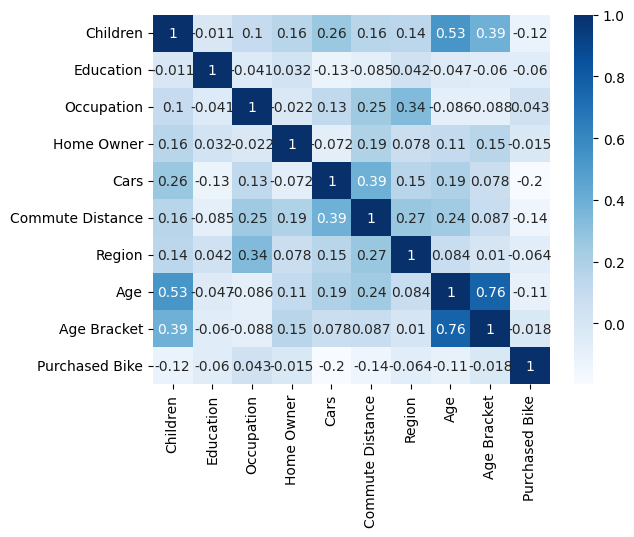

In [67]:
sns.heatmap(corr, cmap='Blues', annot=True)
plt.show

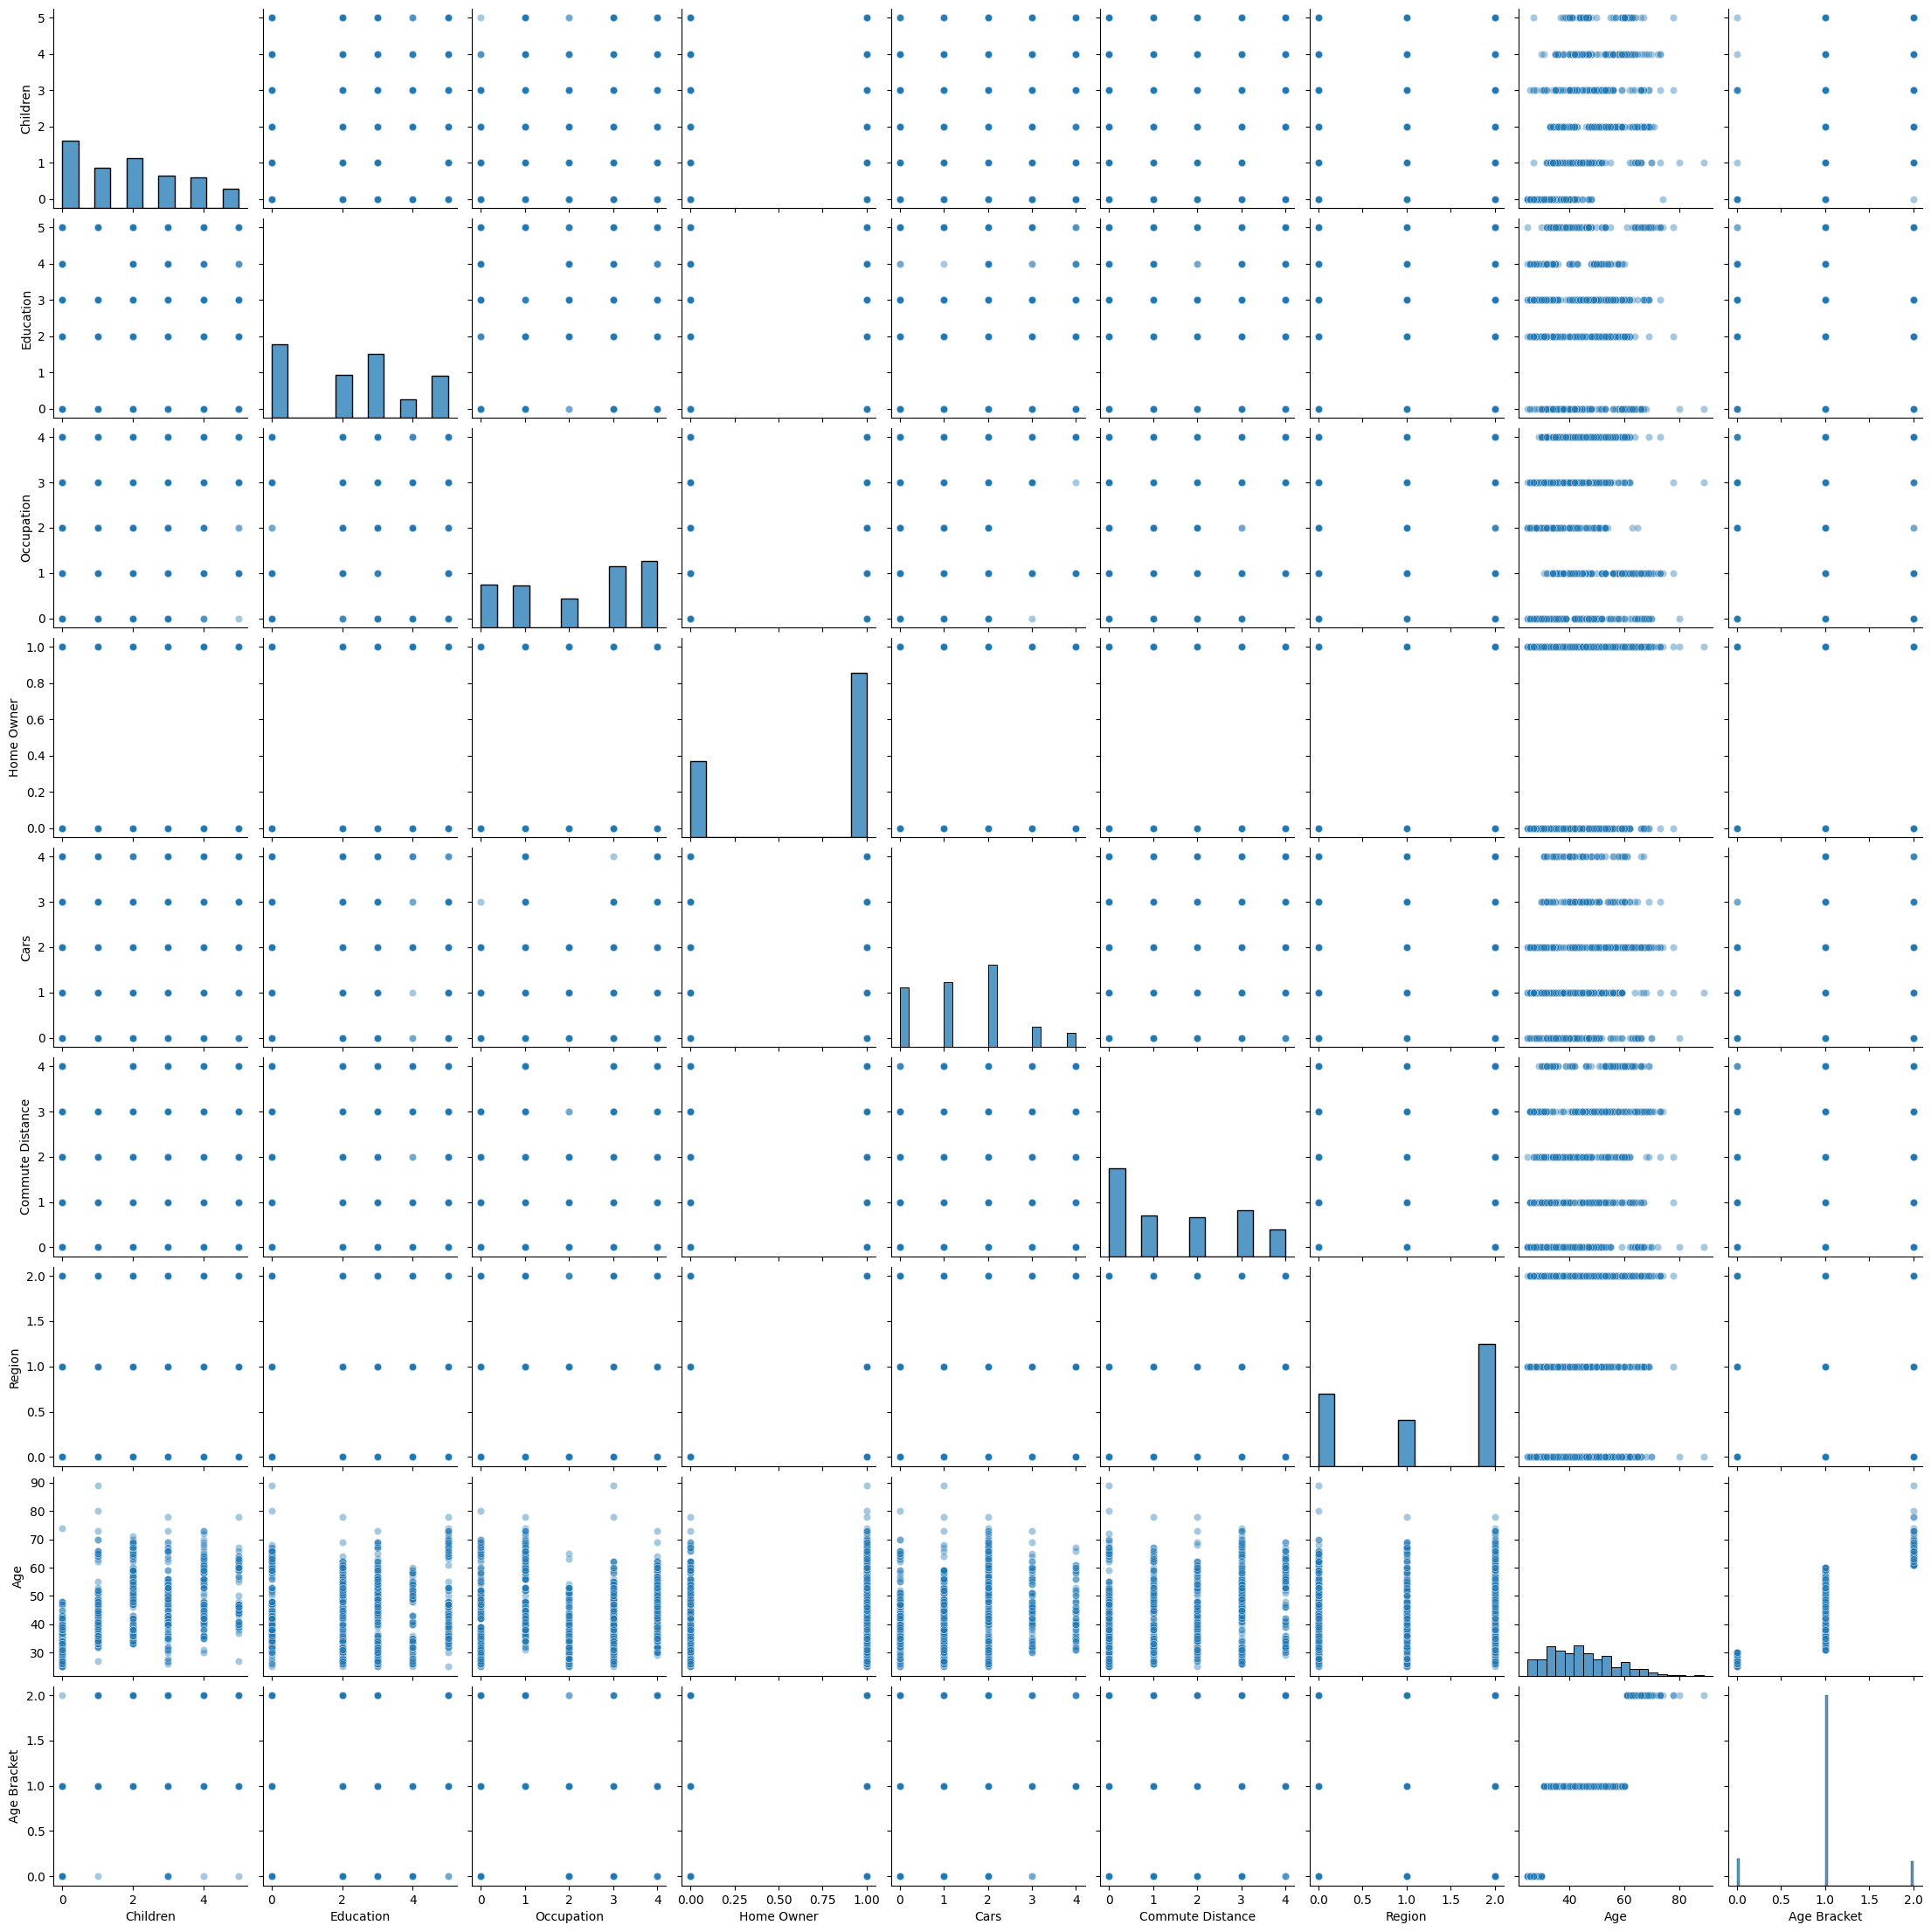

In [68]:
df_numrc = df[['Children', 'Education', 'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age', 'Age Bracket']]
sns.pairplot(df_numrc, kind='scatter', plot_kws={'alpha': 0.4})

## Dropping Columns & Splitting Data

In [69]:
df_1 = df.drop('Purchased Bike', axis=1)

In [70]:
X = df_1
y = df[["Purchased Bike"]]
y_flat = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_flat, test_size= 0.2, random_state=42)

## Training Model

In [71]:
model = RandomForestClassifier(n_estimators=700, n_jobs=-1, max_depth=100, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=True)
model.fit(X_train, y_train)

,n_estimators,700
,criterion,'gini'
,max_depth,100
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [72]:
y_pred_rand = model.predict(X_train)
y_pred_rand

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,

## Hyperparameter Tuning

In [11]:
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [12]:
rf_random = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,
    cv=5, 
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [13]:
rf_random.fit(X_train, y_train)
print(f"Best Hyperparameters: {rf_random.best_params_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': True}


In [14]:
best_rf_model = rf_random.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = precision_score(y_test, y_pred)
print(f"Precision of the best model: {accuracy:.4f}")

Precision of the best model: 0.6458


## Evaluating Model

In [73]:
cm = confusion_matrix(y_train, y_pred_rand)
print(cm)

[[394  19]
 [ 13 374]]


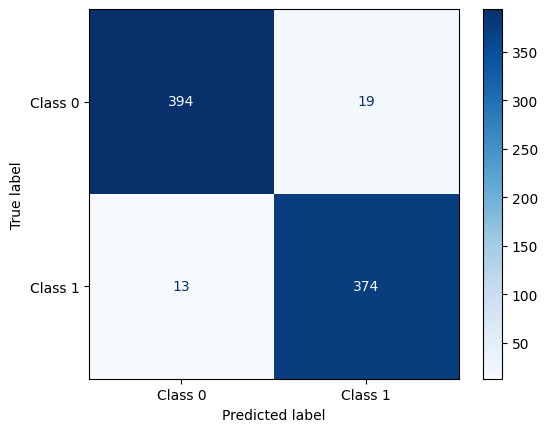

In [74]:
class_labels = ["Class 0", "Class 1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= class_labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [75]:
binary_precision = precision_score(y_train, y_pred_rand)
binary_precision = binary_precision*100
print(f"Precision : {binary_precision:.2f}")

Precision : 95.17


In [76]:
recall = recall_score(y_train, y_pred_rand)
print(f"Recall score: {recall*100}")

Recall score: 96.64082687338501


In [77]:
accuracy = accuracy_score(y_train, y_pred_rand, normalize=True, sample_weight=None)
accuracy*100

96.0

In [78]:
f1_score = f1_score(y_train, y_pred_rand)
print(f"F1 Score: {f1_score*100}")

F1 Score: 95.8974358974359


In [79]:
model_results = pd.DataFrame(['Random Forest', binary_precision, recall*100, accuracy*100, f1_score*100]).transpose()
model_results.columns = ['Method', 'Precision', 'Recall', 'Accuracy', 'F1 Score']
model_results

,Method,Precision,Recall,Accuracy,F1 Score
0,Random Forest,95.165394,96.640827,96.0,95.897436
